In [1]:
import torch
from torch import nn

import numpy as np
from sklearn.model_selection import train_test_split

from ModelHelper import *

# Loading Data

In [2]:
trainData = DatasetRandom(size = 10000)
# trainDataLoader = DataLoader(trainData, batch_size=20, shuffle=True)

testData = DatasetRandom(size = 2000)
# testDataLoader = DataLoader(testData, batch_size=20, shuffle=True)

# Training Data

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [15]:
myModel = myNeural(act_func_1=nn.ReLU, act_func_2=nn.ReLU)

myModel.trainModel(trainData, testData, batch_size = 256, epoch = 3)

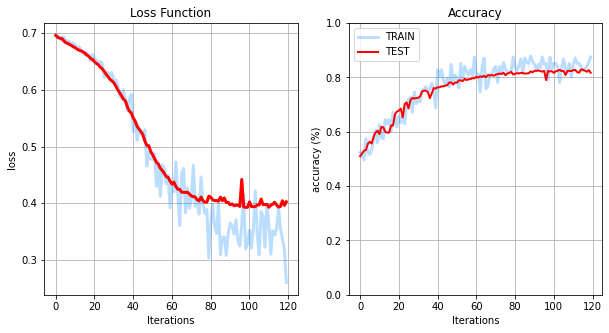

In [16]:
myModel.trainer.plotTraining()

In [17]:
myModel.trainer.trainingStats

{'AvgTrainLoss': tensor(0.4807, grad_fn=<DivBackward0>),
 'MaxTrainLoss': tensor(0.6961, grad_fn=<BinaryCrossEntropyWithLogitsBackward>),
 'AvgTestAcc': tensor(0.7567),
 'negAvgTestAcc': tensor(-0.7567),
 'negRegAvgTestAcc': tensor(-0.6791)}

In [ ]:
firstTrainer = Trainer(myModel, 
                      trainData, testData, lr=0.1)

In [ ]:
firstTrainer.training(epoch=2, batch_size=128)

In [ ]:
firstTrainer.plotTraining()

In [ ]:
myModel = myNeural().to(device)
firstTrainer = Trainer(myModel, 
                      trainData, testData, lr=0.01)
firstTrainer.training(epoch=2, batch_size=128)

In [ ]:
firstTrainer.plotTraining()

In [ ]:
myModel = myNeural().to(device)
firstTrainer = Trainer(myModel, 
                      trainData, testData, lr=1)
firstTrainer.training(epoch=2, batch_size=128)

In [ ]:
firstTrainer.plotTraining()

## Larger Batch-Size
Clearly induces more over-fitting

Smaller batch-size induces more variance in prediction

In [ ]:
myModel = myNeural().to(device)
firstTrainer = Trainer(myModel, 
                      trainData, testData, lr=0.1)
firstTrainer.training(epoch=10, batch_size=1024)

In [ ]:
firstTrainer.plotTraining()

In [ ]:
myModel = myNeural().to(device)
firstTrainer = Trainer(myModel, 
                      trainData, testData, lr=0.1)
firstTrainer.training(epoch=10, batch_size=512)

In [ ]:
firstTrainer.plotTraining()

In [ ]:
myModel = myNeural().to(device)
firstTrainer = Trainer(myModel, 
                      trainData, testData, lr=0.1)
firstTrainer.training(epoch=2, batch_size=64)

In [ ]:
firstTrainer.plotTraining()

In [30]:
myModel = myNeural().to(device)
firstTrainer = Trainer(myModel, 
                      trainData, testData, lr=0.01)
firstTrainer.training(epoch=2, batch_size=24)

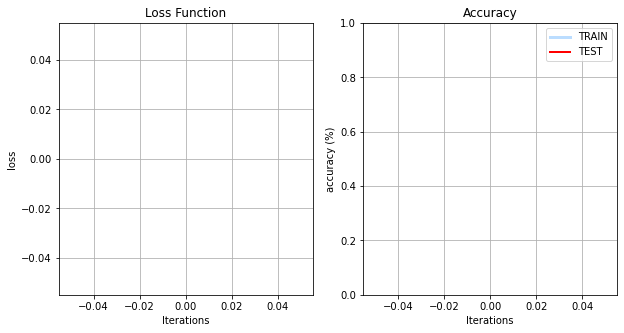

In [28]:
firstTrainer.plotTraining()

In [20]:
from hyperopt import fmin, tpe, hp

In [23]:
def objective(params):
    func = params['func']
    x = params['x']
    
    if func == 'second':
        return 2*x**2 - 6*x
    elif func == 'first':
        return 4*x**2+6*x-4

In [24]:
paramSpace = space = {
    # model parameters
    'func': hp.choice('func', ['first', 'second']),
    
    # trainer parameters
    # 'optimiser': hp.choice('optimiser', [torch.optim.SGD, torch.optim.Adam, torch.optim.LBFGS]),
    'x' : hp.uniform('x', -2, 4),
}

In [25]:
best = fmin(
    fn=objective,
    space=paramSpace,
    algo=tpe.suggest,
    max_evals=100
)

100%|██████████| 100/100 [00:00<00:00, 278.90trial/s, best loss: -6.249485991604229]


In [26]:
best

{'func': 0, 'x': -0.7386641233712249}

In [2]:
import logging

In [32]:
log = logging.getLogger("thisismylogger")

In [3]:
logging.basicConfig(
    level = logging.DEBUG,
    filename='logs/thisismylogger',
    filemode='a',
    format='%(asctime)s - %(name).10s - %(levelname).8s - %(message)s'
)

In [73]:
log.info('hi there')

In [4]:
logging.debug('whatever')

In [75]:
logging.warning('what this is not logged')

In [76]:
log.addHandler(logging.FileHandler('logs/anotherlogger', mode='a'))

In [77]:
log.info('whatever')

In [90]:
log.info('just log then123')

In [80]:
log.warning('log again3')

In [66]:
log.setLevel(logging.DEBUG)

In [79]:
myFormat = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
myHandler = logging.FileHandler('logs/anotherlogger', mode='a')
myHandler.setFormatter(myFormat)
log.addHandler(myHandler)

In [85]:
log.removeHandler(logging.FileHandler('logs/anotherlogger', mode='a'))

In [89]:
log.handlers = log.handlers[-1:]

In [10]:
x = 1344.1231321312441433213213

In [14]:
f"{x:.10f}"

'1344.123132'